1. **Data understanding and EDA**
- **Overview**: Using NTT stock price data, confirm basic statistics, detect time series trends and seasonality, and confirm outliers.
- **Goal**: Understand data trends and extract issues for predictive models.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_csv('new_stock_price.csv')

In [80]:
df.shape

(9202, 7)

In [81]:
df.head()

,Date,closing price,opening price,high price,low price,volume,change rate %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9202 non-null   object 
 1   closing price  9202 non-null   float64
 2   opening price  9202 non-null   float64
 3   high price     9202 non-null   float64
 4   low price      9202 non-null   float64
 5   volume         9202 non-null   object 
 6   change rate %  9202 non-null   object 
dtypes: float64(4), object(3)
memory usage: 503.4+ KB


In [83]:
# checking for missing values and duplicates
df.isnull().sum()

Date             0
closing price    0
opening price    0
high price       0
low price        0
volume           0
change rate %    0
dtype: int64

In [84]:
df.describe()

,closing price,opening price,high price,low price
count,9202.000000,9202.000000,9202.000000,9202.000000
mean,92.180961,92.256183,93.176451,91.330146
std,50.452228,50.598215,51.049837,50.087405
min,33.000000,33.000000,33.200000,32.200000
25%,52.000000,52.100000,52.800000,51.500000
50%,85.100000,85.100000,86.050000,84.200000
75%,110.800000,110.800000,111.900000,109.275000
max,305.900000,309.800000,311.800000,303.900000


### setting date as index and date parsing

In [85]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [86]:
df.set_index('Date',inplace=True)

In [87]:
df.head()

,closing price,opening price,high price,low price,volume,change rate %
Date,,,,,,
2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


In [88]:
df.sample(91)

,closing price,opening price,high price,low price,volume,change rate %
Date,,,,,,
2018-01-30,104.7,106.0,106.8,104.5,148.32M,-1.23%
1999-02-16,94.3,94.4,94.7,94.0,113.26M,0.32%
2014-04-11,51.6,51.0,52.2,50.5,243.97M,-0.58%
2023-07-13,163.1,163.0,163.7,161.7,94.56M,0.06%
2000-10-03,113.0,114.0,115.0,109.0,132.77M,-0.88%
...,...,...,...,...,...,...
1998-04-24,116.0,113.0,116.0,113.0,57.98M,1.75%
1996-03-12,74.9,75.0,75.3,74.5,53.80M,0.27%
1994-11-21,83.9,85.7,85.7,83.8,41.50M,-1.87%


### plotting graph against price vs date

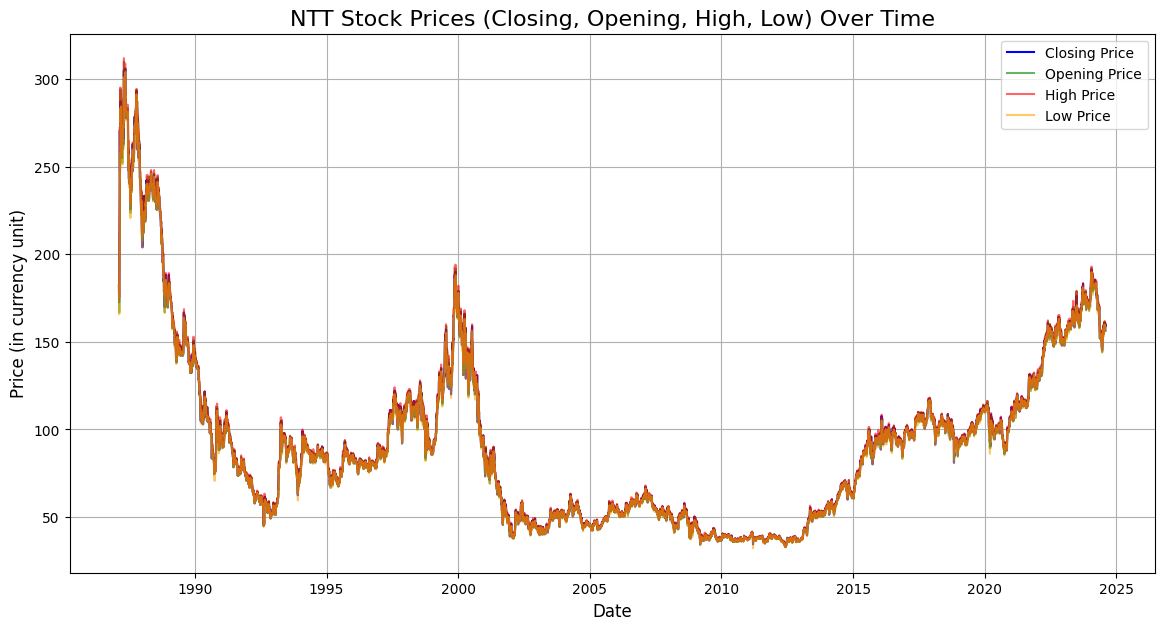

In [89]:
# Plot Closing, Opening, High, and Low Prices
plt.figure(figsize=(14, 7))
plt.plot(df['closing price'], color='blue', label='Closing Price')
plt.plot(df['opening price'], color='green', label='Opening Price', alpha=0.6)
plt.plot(df['high price'], color='red', label='High Price', alpha=0.6)
plt.plot(df['low price'], color='orange', label='Low Price', alpha=0.6)
plt.title('NTT Stock Prices (Closing, Opening, High, Low) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (in currency unit)', fontsize=12)
plt.legend(loc="best")
plt.grid(True)
plt.show()

#### calculating rolling mean and sd for various window size(30,60,365 days)

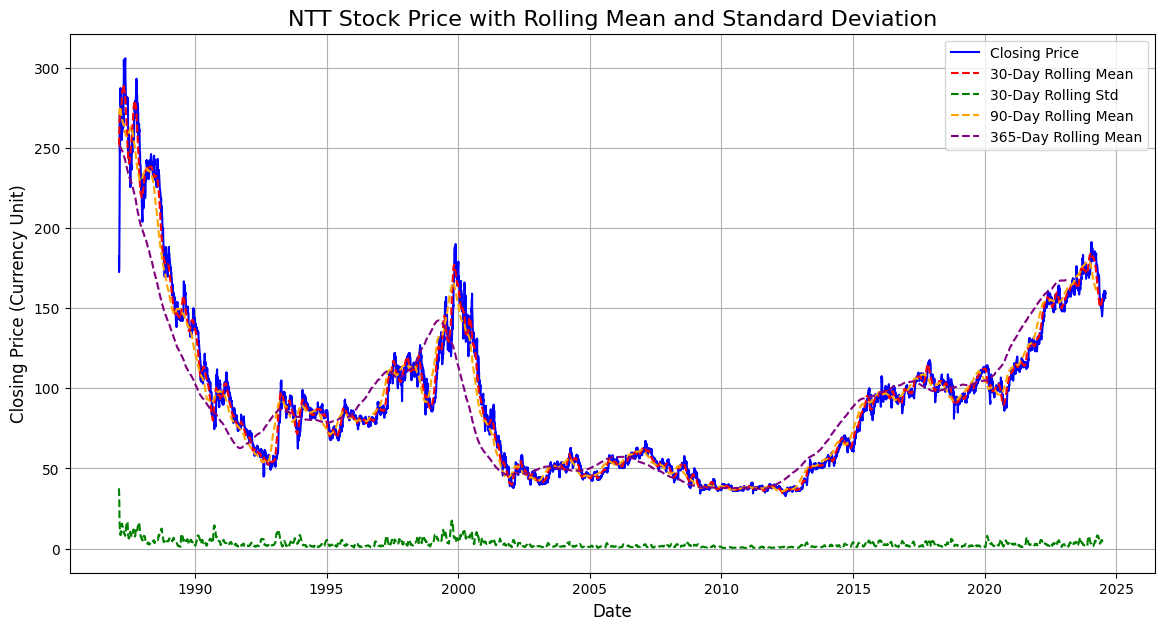

In [90]:
# Calculate rolling mean and standard deviation over a 30-day, 90-day, and 365-day window
df['rolling_mean_30'] = df['closing price'].rolling(window=30).mean()
df['rolling_std_30'] = df['closing price'].rolling(window=30).std()

df['rolling_mean_90'] = df['closing price'].rolling(window=90).mean()
df['rolling_std_90'] = df['closing price'].rolling(window=90).std()

df['rolling_mean_365'] = df['closing price'].rolling(window=365).mean()
df['rolling_std_365'] = df['closing price'].rolling(window=365).std()

# Plot the original closing price along with the rolling mean and standard deviation
plt.figure(figsize=(14, 7))
plt.plot(df['closing price'], label='Closing Price', color='blue')
plt.plot(df['rolling_mean_30'], label='30-Day Rolling Mean', color='red', linestyle='--')
plt.plot(df['rolling_std_30'], label='30-Day Rolling Std', color='green', linestyle='--')
plt.plot(df['rolling_mean_90'], label='90-Day Rolling Mean', color='orange', linestyle='--')
plt.plot(df['rolling_mean_365'], label='365-Day Rolling Mean', color='purple', linestyle='--')

plt.title('NTT Stock Price with Rolling Mean and Standard Deviation', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (Currency Unit)', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()

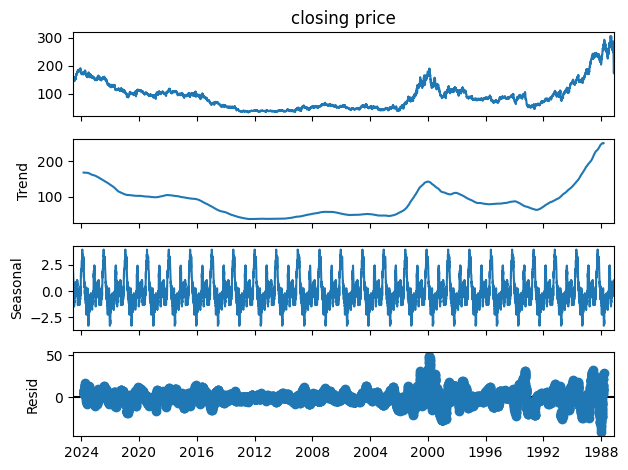

In [91]:
# performing seasonality decomposition on our data
from statsmodels.tsa.seasonal import seasonal_decompose
obj=seasonal_decompose(df['closing price'],model='additive',period=365)
obj.plot()
plt.show()

In [92]:
# Plot stock volume over time
# plt.figure(figsize=(14, 7))
# plt.bar(df.index, df['volume'], color='purple', alpha=0.6)
# plt.title('Stock Trading Volume Over Time', fontsize=16)
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Volume (in units)', fontsize=12)
# plt.grid(True)
# plt.show()

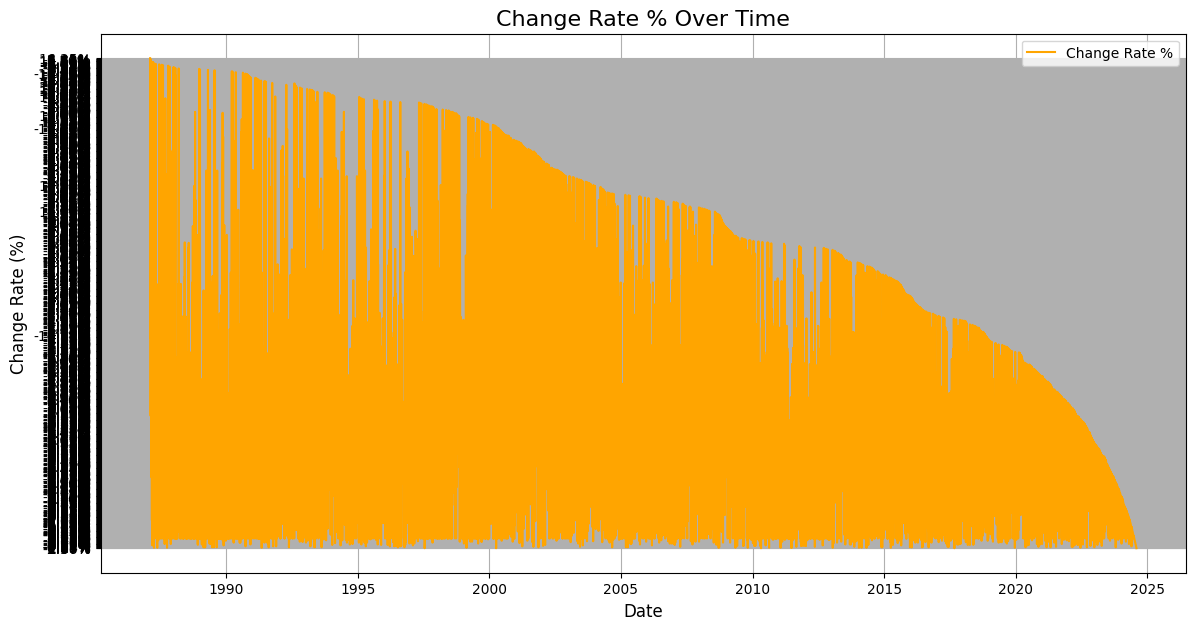

In [93]:
# Plot Change Rate % over time
plt.figure(figsize=(14, 7))
plt.plot(df['change rate %'], color='orange', label='Change Rate %')
plt.title('Change Rate % Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Change Rate (%)', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()


### 2. **Data Preprocessing and Feature Engineering**
- **Overview**: Perform preprocessing such as missing value handling, normalization, and scaling to create features that are useful for stock price prediction.
- **Objective**: Prepare data to improve the accuracy of the model.

In [94]:
df.drop(df.columns[[6,7,8,9,10,11]],axis=1,inplace=True)
df.head()

,closing price,opening price,high price,low price,volume,change rate %
Date,,,,,,
2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


### Handling missing values

In [95]:
df.isnull().sum()

closing price    0
opening price    0
high price       0
low price        0
volume           0
change rate %    0
dtype: int64

There are no missing values however some Volume column units are in B instead of M 

In [96]:
def convert_volume(str):
    if 'B' in str:
        return float(str.replace('B','').strip())*1000
    elif 'M' in str:
        return float(str.replace('M','').strip())
    else:
        return float(str.strip()) #if no unit is present
    
df['volume']=df['volume'].apply(convert_volume)

In [97]:
df.head()

,closing price,opening price,high price,low price,volume,change rate %
Date,,,,,,
2024-08-01,156.3,159.3,159.4,156.1,79.15,-2.56%
2024-07-31,160.4,158.2,160.7,158.1,173.91,1.07%
2024-07-30,158.7,158.8,159.2,158.0,138.14,-0.63%
2024-07-29,159.7,158.7,160.2,158.4,126.28,1.14%
2024-07-26,157.9,159.3,159.6,157.9,155.08,-0.13%


In [98]:
def convert_changerate(it):
    return float(it.replace('%','').strip())/100

df['change rate %']=df['change rate %'].apply(convert_changerate)

In [99]:
df.head()

,closing price,opening price,high price,low price,volume,change rate %
Date,,,,,,
2024-08-01,156.3,159.3,159.4,156.1,79.15,-0.0256
2024-07-31,160.4,158.2,160.7,158.1,173.91,0.0107
2024-07-30,158.7,158.8,159.2,158.0,138.14,-0.0063
2024-07-29,159.7,158.7,160.2,158.4,126.28,0.0114
2024-07-26,157.9,159.3,159.6,157.9,155.08,-0.0013


### Feature engineering

In [100]:
# Create lag features (1 day and 7 days)
df['closing_price_lag_1'] = df['closing price'].shift(1)
df['closing_price_lag_7'] = df['closing price'].shift(7)

# Drop rows with NaN values due to lagging
df.dropna(inplace=True)

In [101]:
# Create moving averages (30-day and 90-day)
df['moving_avg_30'] = df['closing price'].rolling(window=30).mean()
df['moving_avg_90'] = df['closing price'].rolling(window=90).mean()

# Drop rows with NaN values due to moving average calculations
df.dropna(inplace=True)

In [102]:
# Calculate daily returns
df['daily_return'] = df['closing price'].pct_change()

# Drop rows with NaN values due to daily return calculation
df.dropna(inplace=True)

In [103]:
df.head()

,closing price,opening price,high price,low price,volume,change rate %,closing_price_lag_1,closing_price_lag_7,moving_avg_30,moving_avg_90,daily_return
Date,,,,,,,,,,,
2024-03-12,180.9,181.3,182.3,180.0,157.16,-0.0082,180.6,183.5,177.310000,163.128889,0.001661
2024-03-11,182.4,185.1,185.1,180.7,174.60,-0.0167,180.9,180.2,177.676667,163.378889,0.008292
2024-03-08,185.5,184.8,185.5,183.0,194.97,0.0076,182.4,182.1,178.126667,163.673333,0.016996
2024-03-07,184.1,181.5,184.3,181.4,189.96,0.0110,185.5,180.9,178.666667,163.932222,-0.007547
2024-03-06,182.1,180.2,183.2,180.2,153.55,0.0077,184.1,180.5,179.076667,164.181111,-0.010864


### Normalization and scaling

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

colms_to_scale=['closing price', 'opening price', 'high price', 'low price', 'volume', 'moving_avg_30', 'moving_avg_90', 'closing_price_lag_1', 'closing_price_lag_7', 'daily_return']
df[colms_to_scale]=scaler.fit_transform(df[colms_to_scale])

df[colms_to_scale].head()

,closing price,opening price,high price,low price,volume,moving_avg_30,moving_avg_90,closing_price_lag_1,closing_price_lag_7,daily_return
Date,,,,,,,,,,
2024-03-12,0.541957,0.535766,0.535176,0.543982,0.116333,0.560589,0.530786,0.540857,0.551484,0.435596
2024-03-11,0.547453,0.549494,0.545226,0.546559,0.130058,0.562024,0.531828,0.541957,0.539392,0.457458
2024-03-08,0.558813,0.548410,0.546662,0.555024,0.146089,0.563785,0.533055,0.547453,0.546354,0.486156
2024-03-07,0.553683,0.536488,0.542355,0.549135,0.142147,0.565899,0.534134,0.558813,0.541957,0.405234
2024-03-06,0.546354,0.531792,0.538406,0.544718,0.113492,0.567503,0.535171,0.553683,0.540491,0.394299


In [105]:
# Define features (X) and target variable (y)
X = df[['opening price', 'high price', 'low price', 'volume', 'moving_avg_30', 'moving_avg_90', 'closing_price_lag_1', 'closing_price_lag_7', 'daily_return']]
y = df['closing price']

# Split the data into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display shapes of the resulting datasets
print(X_train.shape, X_test.shape)

(7284, 9) (1821, 9)


## 3. **Model Selection and Training**
- **Overview**: Select and implement an appropriate predictive model. Examples include ARIMA models and recurrent neural networks such as LSTM.
- **Objective**: Build a model that can maximize the accuracy of stock price prediction.
- **Notes**: There is no specification for the model to be built, but please be prepared to explain why you selected that model.

### 1)ARIMA (AutoRegression Integrated Moving Average)

In [106]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

ARIMA Test RMSE: 0.3095


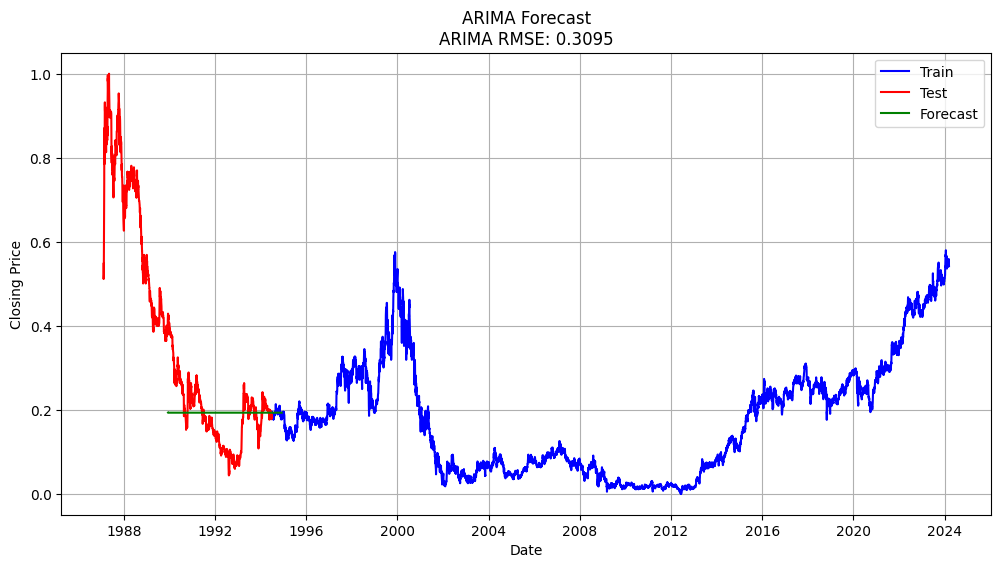

                               SARIMAX Results                                
Dep. Variable:          closing price   No. Observations:                 7284
Model:                 ARIMA(5, 1, 0)   Log Likelihood               27241.517
Date:                Fri, 11 Oct 2024   AIC                         -54471.034
Time:                        18:21:27   BIC                         -54429.675
Sample:                             0   HQIC                        -54456.811
                               - 7284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0014      0.007      0.206      0.837      -0.012       0.015
ar.L2         -0.0220      0.006     -3.480      0.001      -0.034      -0.010
ar.L3         -0.0602      0.007     -9.052      0.0

In [107]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming df is already defined with your stock prices
target = df['closing price']

# Split the data into training and testing sets
train_size = int(len(target) * 0.8)
train, test = target[:train_size], target[train_size:]

# Fit the ARIMA model (order = p, d, q)
arima_model = ARIMA(train, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecasting
forecast = arima_result.forecast(steps=len(test))

# Calculate RMSE for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"ARIMA Test RMSE: {arima_rmse:.4f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='red')
plt.plot(forecast, label='Forecast', color='green')
plt.title(f'ARIMA Forecast\nARIMA RMSE: {arima_rmse:.4f}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

# Print model summary
print(arima_result.summary())


### Why Choose ARIMA?
Strengths: Works well with stationary time series data, where data fluctuations are around a constant mean and variance.
<br>
When to use: If your data does not have complex patterns and exhibits linear trends.

### 2)LSTM

Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - loss: 0.0058
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 1.4888e-04
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 1.4868e-04
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 1.3044e-04
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 1.2788e-04
226/226 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
LSTM Test RMSE: 0.0248


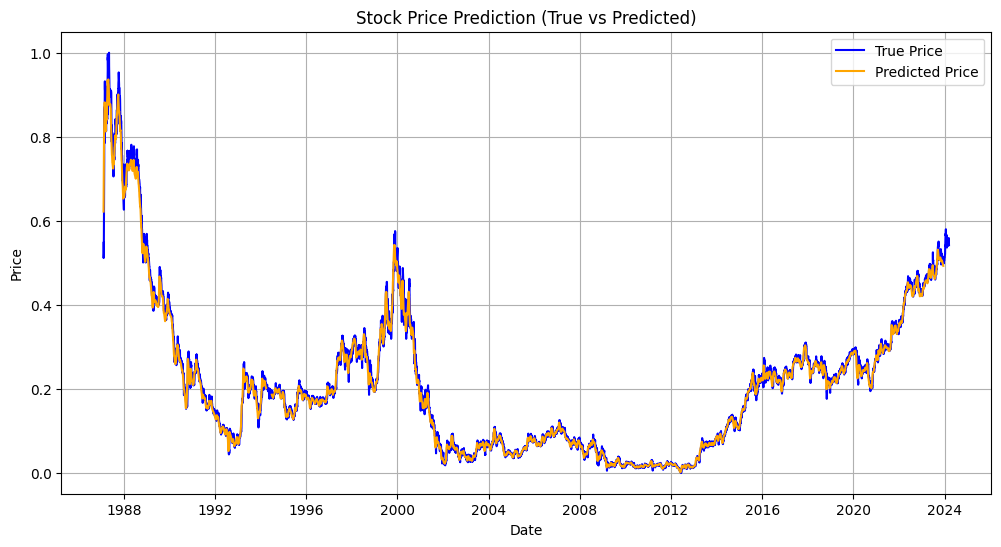

In [110]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming df is already defined with your stock prices
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['closing price'].values.reshape(-1, 1))

# Function to prepare data
def prepare_data(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare the training and testing data
time_step = 60
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:]

X_train, y_train = prepare_data(train_data, time_step)
X_test, y_test = prepare_data(test_data, time_step)

# Reshape into 3D for LSTM input (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=5)

# Predict
train_predictions = model.predict(X_train)
predictions = model.predict(X_test)

# Inverse scale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
predictions = scaler.inverse_transform(predictions)

# Prepare full predictions
full_predictions = np.empty_like(df['closing price'].values)
full_predictions[:] = np.nan

# Place the predicted prices from both training and testing in their correct locations
train_len = len(train_predictions)
test_len = len(predictions)

# Ensure we are using the correct indices
full_predictions[time_step:time_step + train_len] = train_predictions[:, 0]  # Predictions for the training set
full_predictions[train_size + time_step:train_size + time_step + test_len] = predictions[:, 0]  # Predictions for the test set

# Calculate RMSE for LSTM
lstm_rmse = np.sqrt(mean_squared_error(df['closing price'].values[time_step + train_size:], predictions[:, 0]))
print(f"LSTM Test RMSE: {lstm_rmse:.4f}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['closing price'], label='True Price', color='blue')
plt.plot(df.index, full_predictions, label='Predicted Price', color='orange')
plt.title('Stock Price Prediction (True vs Predicted)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


### Why Choose LSTM?
Strengths: Can capture non-linear relationships and long-term dependencies in time series data.
<br>
When to use: If your data has complex patterns, seasonality, and trends.

### 3)Prophet model

18:27:16 - cmdstanpy - INFO - Chain [1] start processing
18:27:27 - cmdstanpy - INFO - Chain [1] done processing


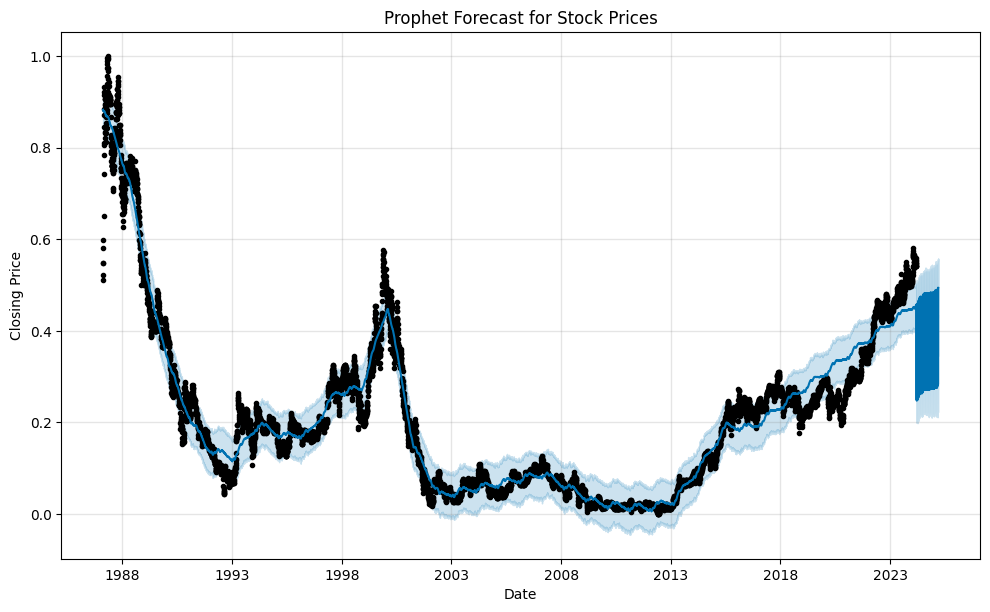

In [111]:
from prophet import Prophet  

# Prepare the DataFrame for Prophet
df.reset_index(inplace=True)
df.rename(columns={'Date': 'ds', 'closing price': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a DataFrame for future predictions
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Plot the results
fig = model.plot(forecast)
plt.title('Prophet Forecast for Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


In [112]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Initialize and fit the Prophet model on training data
model = Prophet()
model.fit(train_df)

# Create a DataFrame for future predictions (covering the test period)
future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)

# Extract the predicted values corresponding to the test set period
predicted_test_values = forecast['yhat'].iloc[-len(test_df):].values

# Calculate RMSE between the actual and predicted values for the test set
test_actual_values = test_df['y'].values
prophet_rmse = np.sqrt(mean_squared_error(test_actual_values, predicted_test_values))

print(f"Prophet Test RMSE: {prophet_rmse}")


18:27:39 - cmdstanpy - INFO - Chain [1] start processing
18:27:46 - cmdstanpy - INFO - Chain [1] done processing


Prophet Test RMSE: 0.31975254603888253


### 4)Random Forest Model

Random Forest RMSE: 0.12512584531256538


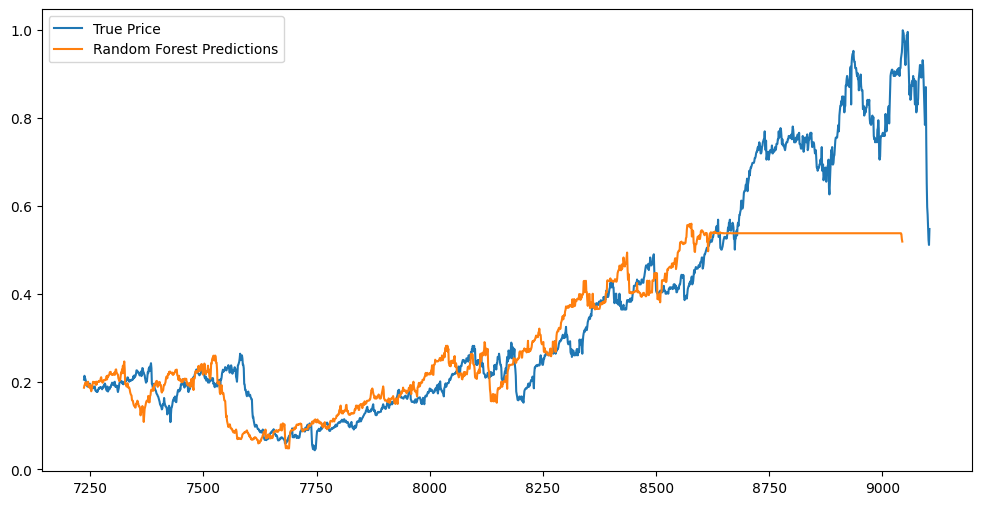

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data for Random Forest model (no need to scale as RF is not sensitive to feature scaling)
X_train_rf = np.array([df['y'].values[i-60:i] for i in range(60, len(df))])
y_train_rf = df['y'].values[60:]

# Split the data into train and test sets (same as for LSTM)
train_size_rf = int(len(X_train_rf) * 0.8)
X_train_rf, X_test_rf = X_train_rf[:train_size_rf], X_train_rf[train_size_rf:]
y_train_rf, y_test_rf = y_train_rf[:train_size_rf], y_train_rf[train_size_rf:]

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Make predictions
rf_predictions = rf_model.predict(X_test_rf)

# Calculate the RMSE for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test_rf, rf_predictions))
print(f"Random Forest RMSE: {rf_rmse}")

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the true price
plt.plot(df['y'][train_size_rf:], label='True Price')

# Make sure the x-axis for predictions has the same length as rf_predictions
plt.plot(range(train_size_rf, train_size_rf + len(rf_predictions)), rf_predictions, label='Random Forest Predictions')

plt.legend()
plt.show()



### 5)Linear Regresssion

Linear Regression Train RMSE: 0.00568473526891054
Linear Regression Test RMSE: 0.011397092973052605


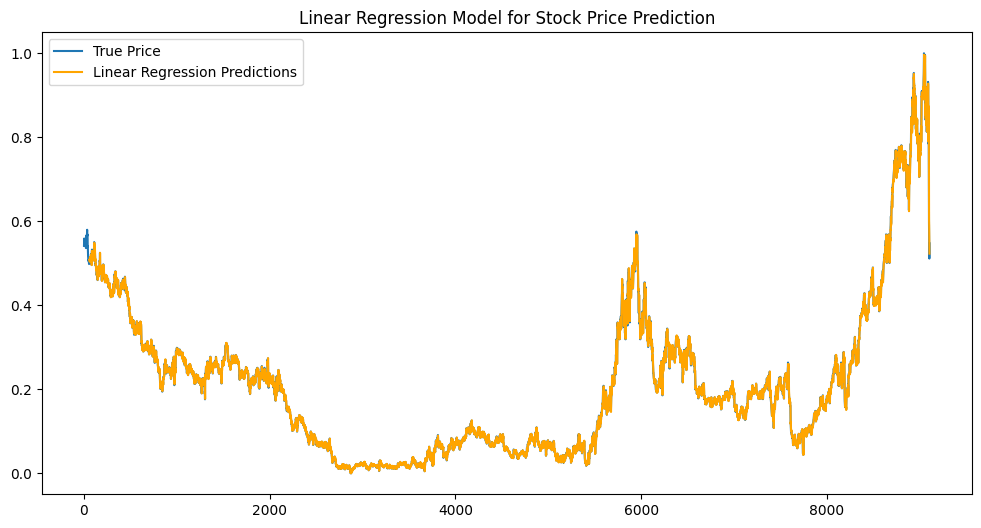

In [114]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the data for Linear Regression (similar to the Random Forest preparation)
X_train_lr = np.array([df['y'].values[i-60:i] for i in range(60, len(df))])
y_train_lr = df['y'].values[60:]

# Split the dataset
train_size_lr = int(len(X_train_lr) * 0.8)
X_train_lr, X_test_lr = X_train_lr[:train_size_lr], X_train_lr[train_size_lr:]
y_train_lr, y_test_lr = y_train_lr[:train_size_lr], y_train_lr[train_size_lr:]

# Reshape the data for the model
X_train_lr = X_train_lr.reshape(X_train_lr.shape[0], -1)
X_test_lr = X_test_lr.reshape(X_test_lr.shape[0], -1)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

# Make predictions
lr_train_predictions = lr_model.predict(X_train_lr)
lr_test_predictions = lr_model.predict(X_test_lr)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train_lr, lr_train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_lr, lr_test_predictions))

print(f"Linear Regression Train RMSE: {train_rmse}")
print(f"Linear Regression Test RMSE: {test_rmse}")

# Plotting the predictions against the actual values
full_predictions_lr = np.empty(len(df))
full_predictions_lr[:] = np.nan

# Insert predictions in the correct location
full_predictions_lr[60:train_size_lr + 60] = lr_train_predictions
full_predictions_lr[train_size_lr + 60:] = lr_test_predictions

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['y'], label='True Price')
plt.plot(full_predictions_lr, label='Linear Regression Predictions', color='orange')
plt.legend()
plt.title('Linear Regression Model for Stock Price Prediction')
plt.show()


In [115]:
# RMSE values from different models (these should be updated based on actual values obtained)
rmse_values = {
    'LSTM': lstm_rmse,  # You should replace lstm_rmse with the actual RMSE of your LSTM model
    'ARIMA': arima_rmse,  # Replace arima_rmse with the actual RMSE of ARIMA
    'Prophet': prophet_rmse,  # Replace prophet_rmse with actual RMSE of Prophet
    'Random Forest': rf_rmse,  # Replace random_forest_rmse with Random Forest's RMSE
    'Linear Regression': test_rmse  # Linear Regression RMSE calculated above
}

# Find the model with the lowest RMSE
best_model = min(rmse_values, key=rmse_values.get)
best_rmse = rmse_values[best_model]

# Print RMSE values and the best model
print("RMSE Values for all models:")
for model, rmse in rmse_values.items():
    print(f"{model}: {rmse}")

print(f"\nThe model with the lowest RMSE is: {best_model} with an RMSE of {best_rmse}")

# You can now use the best_model in your predictions


RMSE Values for all models:
LSTM: 0.024806059901914937
ARIMA: 0.30947919647548044
Prophet: 0.31975254603888253
Random Forest: 0.12512584531256538
Linear Regression: 0.011397092973052605

The model with the lowest RMSE is: Linear Regression with an RMSE of 0.011397092973052605


## 5. **Consider improvement measures and retrain the model**
- **Overview**: Find areas for improvement in the model and retrain it to reflect those improvements.
- **Objective**: Build a more accurate prediction model.
- **Notes**: Please summarize in a presentation what hypotheses you used and the results of your verification.

Here's a detailed overview of potential improvement measures for each model used in your stock price prediction project, along with suggestions for retraining strategies:

### 1. LSTM (Long Short-Term Memory)
- **Areas for Improvement**:
  - **Hyperparameter Tuning**: Experiment with learning rates, batch sizes, and dropout rates to prevent overfitting.
  - **Layer Architecture**: Consider adding more LSTM layers or increasing the number of neurons in each layer to capture more complex patterns.
  - **Epochs and Batch Size**: Increase the number of epochs and adjust batch size for better convergence.
  - **Input Features**: Explore using additional features beyond the closing price, such as trading volume or technical indicators.

- **Retraining Strategy**:
  - Implement grid search or random search to find optimal hyperparameters.
  - Use early stopping to prevent overfitting while training for more epochs.

### 2. ARIMA (AutoRegressive Integrated Moving Average)
- **Areas for Improvement**:
  - **Order Selection**: Experiment with different combinations of p (autoregressive), d (differencing), and q (moving average) parameters. Use AIC/BIC criteria for selection.
  - **Seasonal Components**: If seasonality is present, consider using SARIMA (Seasonal ARIMA) to incorporate seasonal differencing and seasonal lags.

- **Retraining Strategy**:
  - Use historical performance metrics to iterate on order selection.
  - Implement a validation set to ensure that the chosen parameters generalize well.

### 3. Prophet
- **Areas for Improvement**:
  - **Additional Regressors**: If applicable, add extra regressors that could influence the stock prices (e.g., trading volume, market indices).
  - **Holidays**: Incorporate relevant holidays or events that might affect stock prices for better accuracy.

- **Retraining Strategy**:
  - Experiment with different changepoint settings and seasonalities.
  - Validate results using cross-validation over different time periods to ensure stability.

### 4. Random Forest
- **Areas for Improvement**:
  - **Hyperparameter Tuning**: Adjust the number of trees (`n_estimators`), maximum depth (`max_depth`), and minimum samples required to split a node (`min_samples_split`).
  - **Feature Importance**: Analyze feature importance scores to potentially eliminate less important features and improve model performance.

- **Retraining Strategy**:
  - Use techniques like cross-validation for hyperparameter tuning.
  - Consider bagging or boosting methods to enhance performance further.

### 5. Linear Regression
- **Areas for Improvement**:
  - **Polynomial Features**: Explore polynomial regression by adding polynomial terms to capture non-linear relationships.
  - **Interaction Terms**: Include interaction terms between features to account for relationships between independent variables.
  - **Regularization**: Implement regularization techniques like Lasso or Ridge regression to prevent overfitting.

- **Retraining Strategy**:
  - Use cross-validation to evaluate model performance with different feature sets.
  - Experiment with different regularization strengths to improve generalization.

### Summary for Presentation
In your presentation, consider including:
- **Hypotheses**: Briefly outline the hypotheses for each model (e.g., LSTM can capture complex patterns, ARIMA is suitable for time series data).
- **Evaluation Metrics**: Summarize the RMSE values and any other relevant metrics for each model.
- **Improvement Measures**: Clearly state the areas for improvement for each model and the specific changes you plan to implement.
- **Results Verification**: Discuss how you plan to validate improvements (e.g., using a validation set, cross-validation).

This structured approach will help convey your analysis and the thought process behind improving the models in your stock price prediction project. Let me know if you need any further elaboration or specific details!